In [167]:
#                    Chem 210A  C.W. McCurdy
"""
      Definition and plots of H atom radial functions
      using SymPy definition of associated Laguerre functions
      Starting point for problems on H atom tunneling and other properties
      Also: demonstration of use of numerical quadrature routine, quad()
      to perform 1D numerical integrals, for use in tunneling calculations.
"""
#preliminaries to invoke SymPy package and also plots using matplot
#%%

'\n      Definition and plots of H atom radial functions\n      using SymPy definition of associated Laguerre functions\n      Starting point for problems on H atom tunneling and other properties\n      Also: demonstration of use of numerical quadrature routine, quad()\n      to perform 1D numerical integrals, for use in tunneling calculations.\n'

In [168]:
from sympy import * 
import matplotlib.pyplot as plt 
from scipy.integrate import quad  # import numerical quadrature routine
import numpy as np
#  Additional notes: 
#  simplify() doesn't work for simplifing exponents unless the variables are real
#  because it assumes any variable not declared can be complex
#  so explicitly declare them real or integer, as is the case
#
# constants and symbols
#

In [169]:
a0, r  = symbols('a0 r',real=True)
n, l = symbols('n l',integer=True)
Z = symbols('Z',real=True)
x = symbols('x',real=True)
#
# Define radial wave functions, and inner and outer turning points as functions 
# of n,l, and Z
#
def R(n,l,Z,a0,r):
    norm =sqrt( (Z/a0)**3 ) * sqrt(factorial(n-l-1)/factorial(n+l)) 
    psi = norm*exp(-Z*r/(n*a0))*(2/n**2)*(2*Z*r/(n*a0))**l *assoc_laguerre(n-l-1, 2*l+1, 2*Z*r/(n*a0))
    return psi

def outer_turning_pt(n,l,Z,a0):
    Router = n*(n+sqrt(n**2 -l*(l+1)))*a0/Z
    return Router

def inner_turning_pt(n,l,Z,a0):
    Rinner = n*(n-sqrt(n**2 -l*(l+1)))*a0/Z
    return Rinner

#%%
print(inner_turning_pt(10,1,1,1))
print(outer_turning_pt(10,1,1,1))

100 - 70*sqrt(2)
70*sqrt(2) + 100


In [170]:
#  Make a table of the radial functions
print("\n            A table of H atom radial functions  ")
for n in range(1,4):
    for l in range(0,n):
       print("\n n = ",n," l = ",l,"\n R(r) = ")
       print(R(n,l,Z,a0,r))

#


            A table of H atom radial functions  

 n =  1  l =  0 
 R(r) = 
2.0*sqrt(Z**3/a0**3)*exp(-Z*r/a0)

 n =  2  l =  0 
 R(r) = 
0.25*sqrt(2)*sqrt(Z**3/a0**3)*(-Z*r/a0 + 2)*exp(-Z*r/(2*a0))

 n =  2  l =  1 
 R(r) = 
0.0833333333333333*sqrt(6)*Z*r*sqrt(Z**3/a0**3)*exp(-Z*r/(2*a0))/a0

 n =  3  l =  0 
 R(r) = 
0.0740740740740741*sqrt(3)*sqrt(Z**3/a0**3)*(2*Z**2*r**2/(9*a0**2) - 2*Z*r/a0 + 3)*exp(-Z*r/(3*a0))

 n =  3  l =  1 
 R(r) = 
0.0123456790123457*sqrt(6)*Z*r*sqrt(Z**3/a0**3)*(-2*Z*r/(3*a0) + 4)*exp(-Z*r/(3*a0))/a0

 n =  3  l =  2 
 R(r) = 
0.00164609053497942*sqrt(30)*Z**2*r**2*sqrt(Z**3/a0**3)*exp(-Z*r/(3*a0))/a0**2


In [171]:
# normalization integral to check definition of the wave function
#
nval, lval  = symbols('nval  lval',integer=True)
Zval = symbols('Zval',real=True)
x = symbols('x',real=True)
# set value of n , l and Z 
nval = 10
lval = 1
Zval = 1.0 
a0val=1.0

In [166]:
# Use symbolic integration with r***2 dr volume element
# 
norm_int_test = integrate(R(nval,lval,Zval,a0val,x)**2 *x**2,(x,0,oo))
print("\nNormalization (from symbolic integration) for n = ",nval," l  = ",lval," Z = ",Zval,"  <psi|psi> = ",norm_int_test)
#
#  Expectation of r from Sympy symbolic integration
#
r_int_test = integrate(x *R(nval,lval,Zval,a0val,x)**2 *x**2,(x,0,oo))
print("\n<r> for n = ",nval," l  = ",lval," Z = ",Zval,"  <psi|r|psi> = ",r_int_test)
#%%

KeyboardInterrupt: 

In [172]:
#  Numerically integrate square of wave function times volume element over a finite region
#
Z_value = 1.0
a0_value = 1 # use atomic units for length
n_quantum_number = 10 
l_quantum_number = 1
R_inner = 100 - 70*sqrt(2)
R_outer = 70*sqrt(2) + 100

In [173]:
# note use of python lambda function to define the function of x for quad to call
integral_value, error_val = quad( lambda x:R(n_quantum_number,l_quantum_number,Z_value,a0_value,x)**2*x**2,R_inner,R_outer)
print("\nNumerical quadrature test:")
print("Z = ",Z_value," n, l =  ",n_quantum_number,",",l_quantum_number," Integrate R(r)**2 r**2 on ",R_inner," to ",R_outer,"  = ",integral_value )
print("numerical error estimate = ",error_val)


Numerical quadrature test:
Z =  1.0  n, l =   10 , 1  Integrate R(r)**2 r**2 on  100 - 70*sqrt(2)  to  70*sqrt(2) + 100   =  0.8968924192760128
numerical error estimate =  1.331907332945896e-09


In [69]:
symbolic_int = integrate(R(n_quantum_number,l_quantum_number,Z_value,a0_value,x)**2 *x**2,(x,R_inner,R_outer))
print("Value of integral from symbolic integration = ",symbolic_int,"\n")
#


Numerical quadrature test:
Z =  1.0  n, l =   10 , 0  Integrate R(r)**2 r**2 on  0  to  200   =  0.8969321060466839
numerical error estimate =  1.6531559184995801e-09


KeyboardInterrupt: 

In [174]:
#%%
#                                 PLOTTING
# Make a plot of a radial wave function with the n and l values from above, 
# using a0 = 1, atomic units.  Also make a .pdf file of it 
#
print("\n  Plotting radial function with n = ",nval,", l = ",lval, ", Z = ",Zval," \n")
#
# m


  Plotting radial function with n =  10 , l =  1 , Z =  1.0  



In [175]:
#make points for a plot using twice outer turning point as rmax
#
r_pts = []
psi_pts = []
rmax = 2*outer_turning_pt(nval,lval,Zval,a0val)
npts = 201 
dx = rmax/npts
for icount in range(npts+1):
    rval = icount*dx 
    r_pts.append(rval)
    psi_pts.append(R(nval,lval,Zval,a0val,rval))


 Close figure window to proceed and make .pdf file of figure


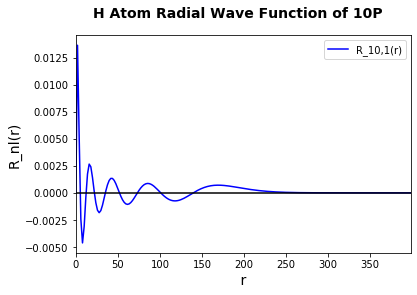

In [176]:
   
# make a string that labels n and l values    
number_string=str(nval)+str(lval)
string = "R_"+ str(nval)+","+ str(lval) +"(r)"  # make a string for the legend with n and l
plt.plot(r_pts,psi_pts,'-b',label=string)
plt.plot([0,rmax],[0,0],'k')  # put in a line at the value R(r) = 0
plt.legend(loc="best")
plt.xlabel(" r ", fontsize=14)
plt.ylabel("R_nl(r)", fontsize=14)
plt.suptitle('H Atom Radial Wave Function of 10P', fontsize=14, fontweight='bold')
xmax = float(rmax)  # CWM: need to use float() to get plt.xlim to work to set x limits
plt.xlim([0,xmax])
#ymax = float( something ) #need to use float() to get plt.ylim to work to set y limits
#plt.ylim([0,ymax])
print("\n Close figure window to proceed and make .pdf file of figure")

plt.savefig('10_probability'+number_string+'.pdf', transparent=False)
plt.show()
#uncomment exit() statement when running from console
#exit()

In [95]:
1-0.9193

0.0807

In [102]:
4 - 2*np.sqrt(2)

1.1715728752538097

In [103]:
2*np.sqrt(2) + 4

6.82842712474619

In [104]:
6.8284-1.1715

5.6569

In [112]:
1-0.80374

0.19626

In [139]:
1-0.89693

0.10307